# Ollama Python Library - Introduction
by Mjrovai @ Sept25

In [1]:
import ollama

In [20]:
models = ollama.list()
for model in models['models']:
    print(model['model'])

moondream:latest
llama3.2:3b


In [27]:
#ollama.show('llama3.2:3b')

In [35]:
info = ollama.show('llama3.2:3b')

print("Model/Format               :", getattr(info, 'model', None))
print("Parameter Size             :", getattr(info.details, 'parameter_size', None))
print("Quantization Level         :", getattr(info.details, 'quantization_level', None))
print("Family                     :", getattr(info.details, 'family', None))
print("Supported Capabilities      :", getattr(info, 'capabilities', None))
print("Date Modified (Local)      :", getattr(info, 'modified_at', None))
print("License Short              :", (str(getattr(info, 'license', None)).split('\n')[0]))
print("Key Architecture Details   :")

for key in [
    'general.architecture', 'general.finetune',
    'llama.context_length', 'llama.embedding_length', 'llama.block_count'
]:
    print(f" - {key}: {info.modelinfo.get(key)}")

Model/Format               : None
Parameter Size             : 3.2B
Quantization Level         : Q4_K_M
Family                     : llama
Supported Capabilities      : ['completion', 'tools']
Date Modified (Local)      : 2025-09-15 15:39:48.153510-03:00
License Short              : LLAMA 3.2 COMMUNITY LICENSE AGREEMENT
Key Architecture Details   :
 - general.architecture: llama
 - general.finetune: Instruct
 - llama.context_length: 131072
 - llama.embedding_length: 3072
 - llama.block_count: 28


## Ollama Generate

In [3]:
response = ollama.generate(
    model="llama3.2:3b",
    prompt="Qual a capital do Brasil"
)
print(response['response'])

A capital do Brasil é Brasília.


In [13]:
MODEL="llama3.2:3b"

In [16]:
def simple_query(prompt, model=MODEL):
    response = ollama.generate(
    model=MODEL,
    prompt=prompt
    )
    return response

In [17]:
response = simple_query ("Qual a capital do Peru?")
response

GenerateResponse(model='llama3.2:3b', created_at='2025-09-26T16:57:40.846158933Z', done=True, done_reason='stop', total_duration=1551795477, load_duration=190827912, prompt_eval_count=31, prompt_eval_duration=168621409, eval_count=8, eval_duration=1191759188, response='A capital do Peru é Lima.', thinking=None, context=[128006, 9125, 128007, 271, 38766, 1303, 33025, 2696, 25, 6790, 220, 2366, 18, 271, 128009, 128006, 882, 128007, 271, 32129, 264, 6864, 656, 48847, 30, 128009, 128006, 78191, 128007, 271, 32, 6864, 656, 48847, 4046, 63053, 13])

In [32]:
print(f"{response['response']}")

A capital do Peru é Lima.


In [31]:
# The time taken for the model to generate the response is in nanoseconds
print(f"Total Duration: {(response['total_duration']/1e9):.2f} seconds")

Total Duration: 1.55 seconds


In [30]:
print(f"eval_count: {response['eval_count']}")
print(f"eval_duration: {(response['eval_duration']/1e9):.2f} s")
print(f"eval_rate: {response['eval_count']/(response['eval_duration']/1e9):.2f} tokens/s")

eval_count: 8
eval_duration: 1.19 s
eval_rate: 6.71 tokens/s


### Streaming with ollama.generate()

To stream output from `ollama.generate()` in Python, we should set `stream=True` and iterate through the returned generator to print each chunk as it's produced. This enables real-time response streaming, similar to chat models

In [28]:
stream = ollama.generate(
    model='llama3.2:3b',
    prompt='Tell me an interesting fact about Brazil',
    stream=True
)

for chunk in stream:
    print(chunk['response'], end='', flush=True)

Here's one:

Did you know that Brazil is home to the world's largest population of pink dolphins? The pink dolphin, also known as the botos, can be found in the Amazon and Paraná rivers, which run through the country. These majestic creatures are a popular tourist attraction and are considered an iconic symbol of Brazilian culture.

In fact, there are two species of pink dolphins: the freshwater boto (inhabiting the Amazon River) and the saltwater botolphus (found in the Paraná River). Both are endangered due to habitat loss, pollution, and other human activities. Conservation efforts are underway to protect these incredible animals and their habitats.

Brazil's unique biodiversity is truly fascinating!

- Each `chunk['response']` is a part of the generated text, streamed as it's created
- This allows responsive, real-time interaction in the terminal or UI.

This approach is ideal for long or complex generations, making the user experience feel faster and more interactive

## Ollama Chat

In [29]:
response = ollama.chat(
    model='llama3.2:3b',
    messages=[
        {'role': 'user', 'content': 'What is the capital of Malawi?'},
    ]
)
print(response['message']['content'])

The capital of Malawi is Lilongwe.


In [30]:
for chunk in ollama.chat(
    model='llama3.2:3b',
    messages=[{'role': 'user', 'content': 'Tell me a joke.'}],
    stream=True
):
    print(chunk['message']['content'], end='', flush=True)

Why don't eggs tell jokes?

Because they'd crack each other up!

## Key Advanced Features

Ollama’s Python API offers numerous advanced features beyond specifying a model, prompt (or messages), and streaming responses. These options let us customize generations, manage context, control system prompts, handle tool-calling, and more, enabling robust and intelligent LLM applications

- **System Prompt**  
  Add a `system` parameter to set overall instructions or behavior for the model (useful for role assignment and tone control)

In [34]:
response = ollama.generate(model='llama3.2:3b', 
                prompt='Tell about industry', 
                system='You are an expert on Brazil.', 
                stream=False)
print(response['response'])

Brazil is a rapidly developing country with a diverse and vibrant economy, driven by several key industries. Here's an overview:

**Main Industries:**

1. **Agriculture**: Agriculture is the backbone of Brazil's economy, accounting for approximately 10% of GDP. The country is the world's largest producer of soybeans, coffee, sugar, cotton, and cattle.
2. **Mining**: Mining is another significant sector, with Brazil being a major producer of iron ore, copper, gold, diamonds, and other minerals.
3. **Manufacturing**: Brazil has a growing manufacturing sector, particularly in industries such as automobiles, machinery, textiles, and food processing.
4. **Energy**: Energy is an increasingly important sector, with Brazil investing heavily in renewable energy sources like solar, wind, and hydroelectric power.
5. **Services**: The services sector, including finance, logistics, tourism, and IT, accounts for a significant share of the country's GDP.

**Key Sectors:**

1. **Soybean exports**: Bra

- **Temperature and Sampling**  

Control creativity/randomness via `temperature`, and customize output style with extra settings like `top_p` and `num_ctx` (context window size)

In [38]:
response = ollama.generate(
    model='llama3.2:3b', 
    prompt='Whay the sky is blue?', 
    options={'temperature':0.1}, 
    stream=True)
for chunk in response:
    print(chunk['response'], end='', flush=True)

The sky appears blue because of a phenomenon called Rayleigh scattering, named after the British physicist Lord Rayleigh. He discovered that when sunlight enters Earth's atmosphere, it encounters tiny molecules of gases such as nitrogen and oxygen.

Here's what happens:

1. **Sunlight enters the atmosphere**: When sunlight enters our atmosphere, it consists of a spectrum of colors, including all the colors of the visible light.
2. **Scattering occurs**: As sunlight travels through the atmosphere, it encounters tiny molecules of gases like nitrogen (N2) and oxygen (O2). These molecules scatter the light in all directions.
3. **Shorter wavelengths are scattered more**: The smaller wavelengths of light, such as blue and violet, are scattered more than the longer wavelengths, like red and orange. This is because the smaller molecules are more effective at scattering shorter wavelengths.
4. **Blue light dominates**: As a result of this scattering, the blue light is distributed throughout th

In [39]:
response = ollama.chat(
    messages=[
        {"role": "user", "content": "Poetically describe Paris in one short sentence"},
    ],
    model='llama3.2:3b',
    options={"temperature": 1.0}  # Setting temperature to 1.0 for more creativity
)
print(response['message']['content'])

Like a velvet-draped secret, Paris whispers ancient mysteries to the moonlit Seine, her sighing shadows weaving an eternal waltz of love and dreams.


In [40]:
response = ollama.chat(
    messages=[
        {"role": "user", "content": "Poetically describe Paris in one short sentence"},
    ],
    model='llama3.2:3b',
    options={"temperature": 0.1}  # Setting temperature to 0.1 for less creativity
)
print(response['message']['content'])

Softly glowing City of Light, where moonlit Seine whispers secrets to the Eiffel's iron lace.


## Memory

In [34]:
response = simple_query ("Qual a capital do Brasil?")
print(f"{response['response']}")

A capital do Brasil é Brasília.


In [35]:
response = simple_query ("E a do Perú?")
print(f"{response['response']}")

Parece que você está falando em espanhol!

Sim, "e la" é uma expressão comum em castelhano para dizer "e ela".


### Including "Memory"

- using ollama.chat()

In [43]:
# Initialize conversation history
conversation = []

# Function to chat with memory
def chat_with_memory(prompt, model=MODEL):
    global conversation
    
    # Add user message to conversation
    conversation.append({"role": "user", "content": prompt})
    
    # Generate response with conversation history
    response = ollama.chat(
        model=MODEL,
        messages=conversation
    )
    
    # Add assistant's response to conversation history
    conversation.append(response["message"])
    
    # Return just the response text
    return response["message"]["content"]

In [44]:
# Question
prompt = "Qual a capital do Brasil"
print(chat_with_memory(prompt))

# Ask a follow-up question that relies on memory
follow_up = "E a do Perú?"
print(chat_with_memory(follow_up))

A capital do Brasil é Brasília.
A capital do Peru é Lima.


## Image Description

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from picamera2 import Picamera2
from PIL import Image

In [3]:
def capture_image(image_path):
    # Initialize camera
    picam2 = Picamera2() # default is index 0
    
    # Configure the camera
    config = picam2.create_still_configuration(main={"size": (520, 520)})
    picam2.configure(config)
    picam2.start()
    
    # Wait for the camera to warm up
    time.sleep(2)
    
    # Capture image
    picam2.capture_file(image_path)
    print("Image captured: "+image_path)
    
    # Stop camera
    picam2.stop()
    picam2.close()

In [5]:
IMG_PATH = "/home/mjrovai/Documents/OLLAMA/SST/capt_image.jpg"
capture_image(IMG_PATH)

[4:14:23.386612103] [29760]  INFO Camera camera_manager.cpp:330 libcamera v0.5.2+99-bfd68f78
[4:14:23.397343557] [29793]  INFO RPI pisp.cpp:720 libpisp version v1.2.1 981977ff21f3 29-04-2025 (14:13:50)
[4:14:23.400821702] [29793]  INFO IPAProxy ipa_proxy.cpp:180 Using tuning file /usr/share/libcamera/ipa/rpi/pisp/ov5647.json
[4:14:23.411579286] [29793]  INFO Camera camera_manager.cpp:220 Adding camera '/base/axi/pcie@1000120000/rp1/i2c@88000/ov5647@36' for pipeline handler rpi/pisp
[4:14:23.411597582] [29793]  INFO RPI pisp.cpp:1179 Registered camera /base/axi/pcie@1000120000/rp1/i2c@88000/ov5647@36 to CFE device /dev/media0 and ISP device /dev/media2 using PiSP variant BCM2712_C0
[4:14:23.416334424] [29760]  INFO Camera camera.cpp:1215 configuring streams: (0) 520x520-BGR888/sRGB (1) 640x480-GBRG_PISP_COMP1/RAW
[4:14:23.416459296] [29793]  INFO RPI pisp.cpp:1483 Sensor: /base/axi/pcie@1000120000/rp1/i2c@88000/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10/RAW - Selected CFE 

Image captured: /home/mjrovai/Documents/OLLAMA/SST/capt_image.jpg


In [12]:
def show_image(image_path):
    img = Image.open(image_path)
    
    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("Captured Image")
    plt.show()

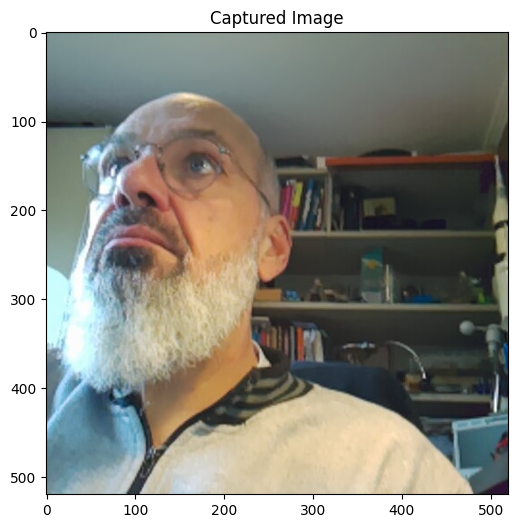

In [13]:
show_image(IMG_PATH)

In [7]:
def image_description(img_path, model):
    with open(img_path, 'rb') as file:
        response = ollama.chat(
            model=model,
            messages=[
              {
                'role': 'user',
                'content': '''return the description of the image''',
                'images': [file.read()],
              },
            ],
            options = {
              'temperature': 0,
              }
      )
    return response

In [8]:
MODEL = "moondream:latest"

In [9]:
IMG_PATH

'/home/mjrovai/Documents/OLLAMA/SST/capt_image.jpg'

In [10]:
response = image_description(IMG_PATH, MODEL)
caption = response['message']['content']
print ("\n==> AI Response:", caption)


==> AI Response: 
The image features a bald man with glasses and a beard sitting in an office chair. He is wearing a white shirt, which contrasts with his gray beard. The office space around him includes several bookshelves filled with various books, indicating that he might be working or studying in this environment. There are also two TVs visible in the room, one on the left side and another towards the right edge of the image.


In [11]:
print(f"\n[INFO] ==> Total Duration: {(response['total_duration']/1e9):.2f} seconds")


[INFO] ==> Total Duration: 72.73 seconds


## Putting all together

In [15]:
import time
import numpy as np
import matplotlib.pyplot as plt
from picamera2 import Picamera2
from PIL import Image

In [16]:
IMG_PATH = "/home/mjrovai/Documents/OLLAMA/SST/capt_image.jpg"
MODEL = "moondream:latest"

[4:21:07.579909448] [29797]  INFO Camera camera_manager.cpp:330 libcamera v0.5.2+99-bfd68f78
[4:21:07.590613203] [30874]  INFO RPI pisp.cpp:720 libpisp version v1.2.1 981977ff21f3 29-04-2025 (14:13:50)
[4:21:07.594080404] [30874]  INFO IPAProxy ipa_proxy.cpp:180 Using tuning file /usr/share/libcamera/ipa/rpi/pisp/ov5647.json
[4:21:07.604675251] [30874]  INFO Camera camera_manager.cpp:220 Adding camera '/base/axi/pcie@1000120000/rp1/i2c@88000/ov5647@36' for pipeline handler rpi/pisp
[4:21:07.604694214] [30874]  INFO RPI pisp.cpp:1179 Registered camera /base/axi/pcie@1000120000/rp1/i2c@88000/ov5647@36 to CFE device /dev/media0 and ISP device /dev/media2 using PiSP variant BCM2712_C0
[4:21:07.608893589] [29797]  INFO Camera camera.cpp:1215 configuring streams: (0) 520x520-BGR888/sRGB (1) 640x480-GBRG_PISP_COMP1/RAW
[4:21:07.609014701] [30874]  INFO RPI pisp.cpp:1483 Sensor: /base/axi/pcie@1000120000/rp1/i2c@88000/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10/RAW - Selected CFE 

Image captured: /home/mjrovai/Documents/OLLAMA/SST/capt_image.jpg


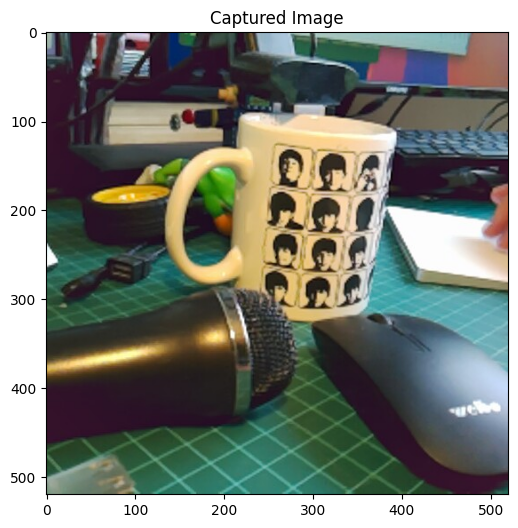


==> AI Response: 
The image features a green table with various items on it. A white mug adorned with black faces is prominently displayed, and there are several other mugs scattered around the table as well. In addition to the mugs, there's also a microphone placed near them, suggesting that this might be an office or workspace setting where someone could enjoy their coffee while recording podcasts or audio content.

A computer keyboard can be seen in the background, indicating that it is likely connected to a computer for work purposes. A mouse and a cell phone are also present on the table, further emphasizing the technology-oriented nature of this scene.

[INFO] ==> Total Duration: 62.06 seconds


In [17]:
capture_image(IMG_PATH)
show_image(IMG_PATH)
response = image_description(IMG_PATH, MODEL)
caption = response['message']['content']
print ("\n==> AI Response:", caption)
print(f"\n[INFO] ==> Total Duration: {(response['total_duration']/1e9):.2f} seconds")